In [6]:
import numpy as np
import pandas as pd

In [7]:
df=pd.read_csv("datasets/Bank Customer Churn Prediction.csv")

In [8]:
df.shape

(10000, 12)

In [9]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [12]:
num_cols=[col for col in df.columns if df[col].dtype!='object']
var_cols=[col for col in df.columns if df[col].dtype=='object']
print(num_cols)
print(var_cols)

['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']
['country', 'gender']


In [13]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

<Axes: ylabel='age'>

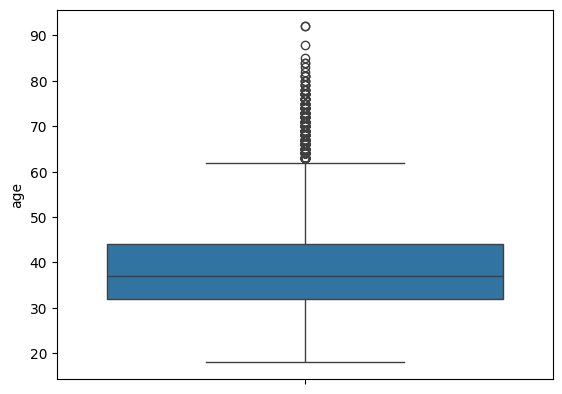

In [14]:
#univariate analysis
import seaborn as sn
sn.boxplot(df['age'])

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df[num_cols])
df[num_cols]=pd.DataFrame(scaled_data)

In [16]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,-0.783213,-0.326221,France,Female,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-0.606534,-0.440036,Spain,Female,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-0.995885,-1.536794,France,Female,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,0.144767,0.501521,France,Female,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,0.652659,2.063884,Spain,Female,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775


<Axes: xlabel='gender', ylabel='age'>

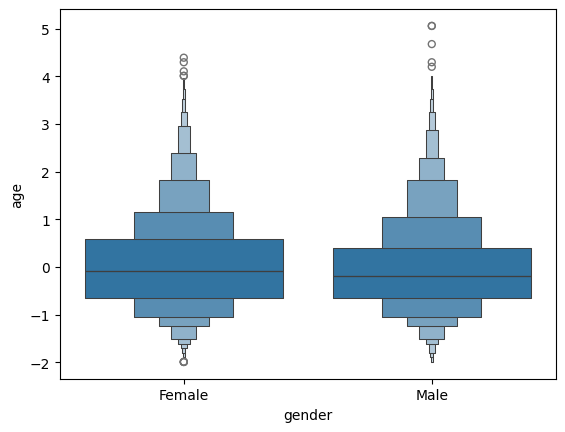

In [17]:
sn.boxenplot(y="age",x="gender",data=df)

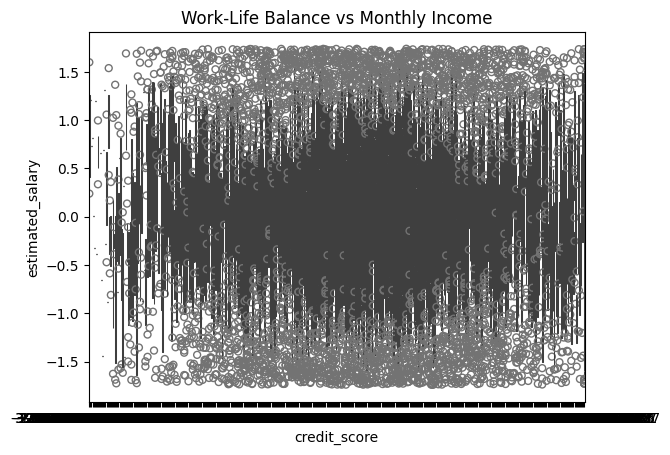

In [18]:
import matplotlib.pyplot as plt
sn.boxenplot(
    x="credit_score",
    y="estimated_salary",
    data=df
)
plt.title("Work-Life Balance vs Monthly Income")
plt.show()


<Axes: xlabel='estimated_salary', ylabel='Count'>

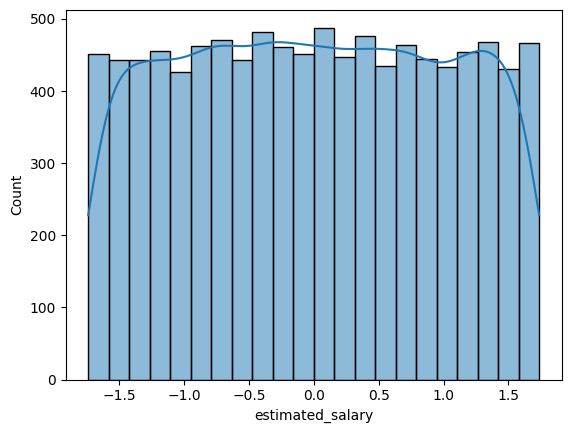

In [19]:
sn.histplot(df["estimated_salary"], kde=True)


<Axes: xlabel='tenure', ylabel='count'>

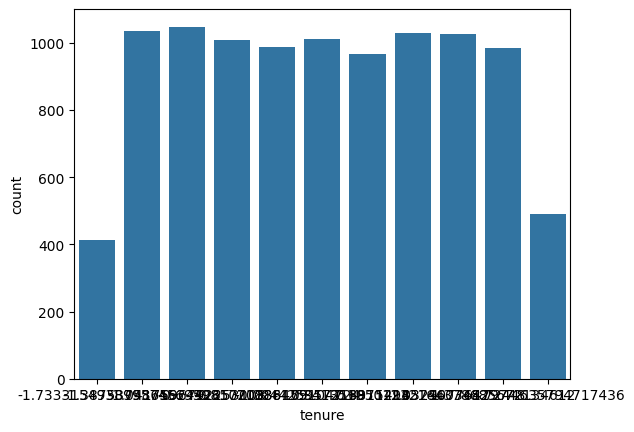

In [20]:
sn.countplot(x="tenure",data=df)

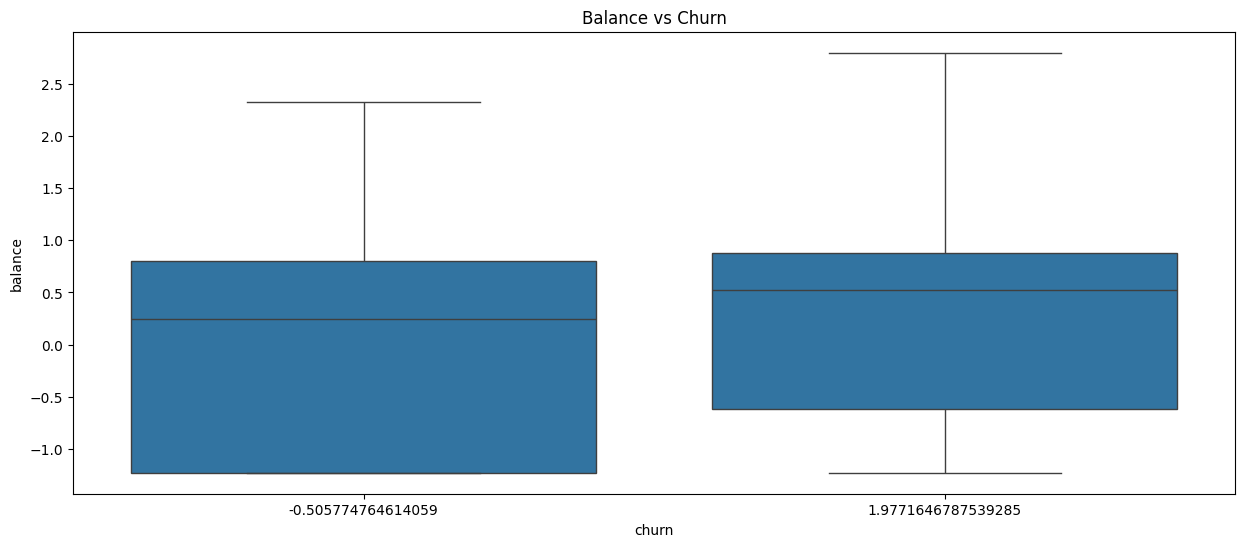

In [22]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(15, 6))
sn.boxplot(x='churn', y='balance', data=df)
plt.title('Balance vs Churn')
plt.show()



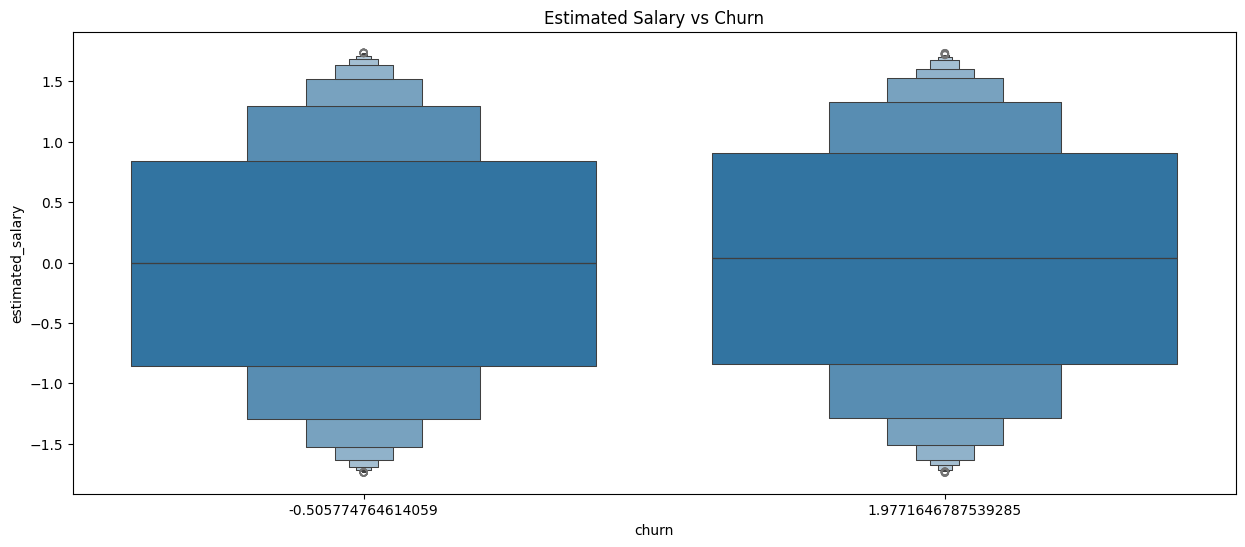

In [24]:
plt.figure(figsize=(15, 6))
sn.boxenplot(x='churn', y='estimated_salary', data=df)
plt.title('Estimated Salary vs Churn')
plt.show()


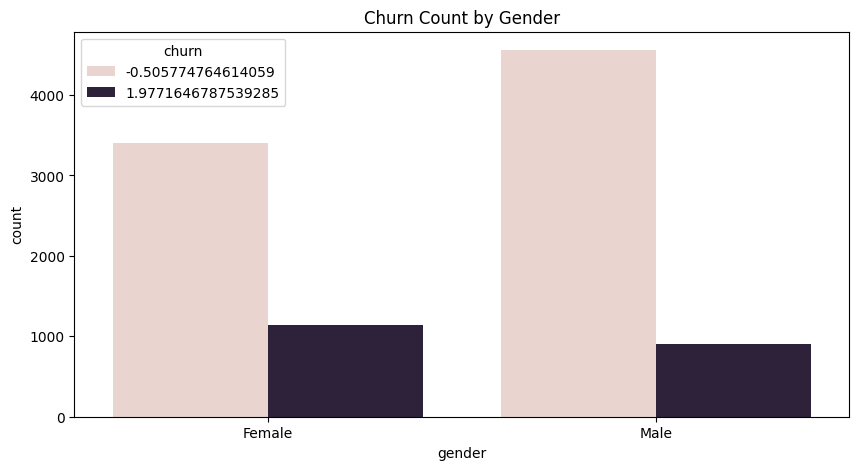

In [26]:
plt.figure(figsize=(10, 5))
sn.countplot(x='gender', hue='churn', data=df)
plt.title('Churn Count by Gender')
plt.show()


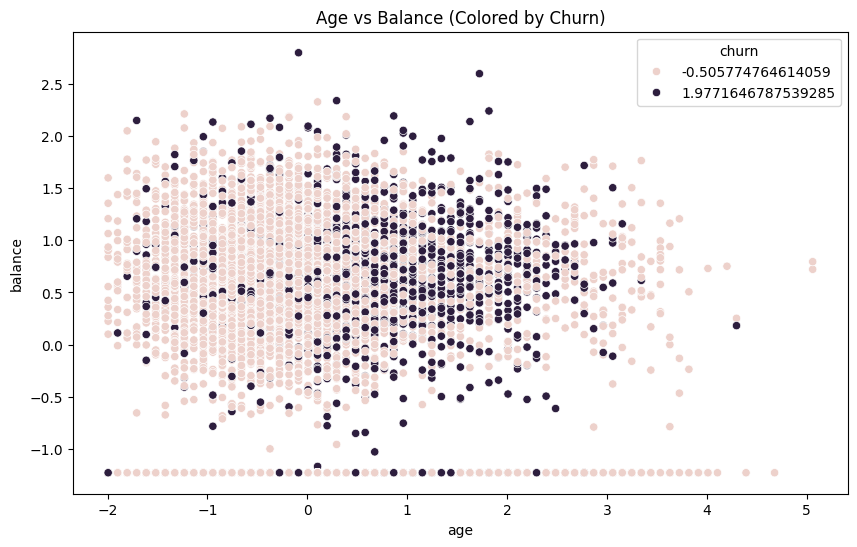

In [29]:
plt.figure(figsize=(10, 6))
sn.scatterplot(
    x='age',
    y='balance',
    hue='churn',
    data=df
)
plt.title('Age vs Balance (Colored by Churn)')
plt.show()


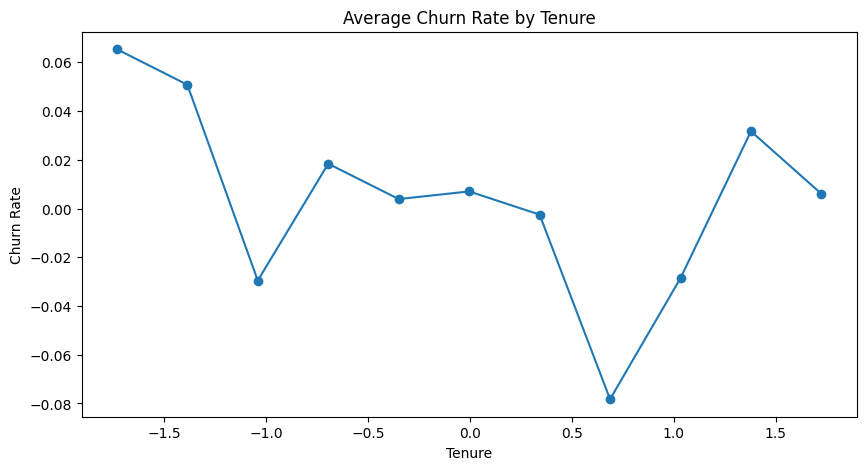

In [31]:
tenure_churn = df.groupby('tenure')['churn'].mean()

plt.figure(figsize=(10, 5))
tenure_churn.plot(kind='line', marker='o')
plt.title('Average Churn Rate by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.show()


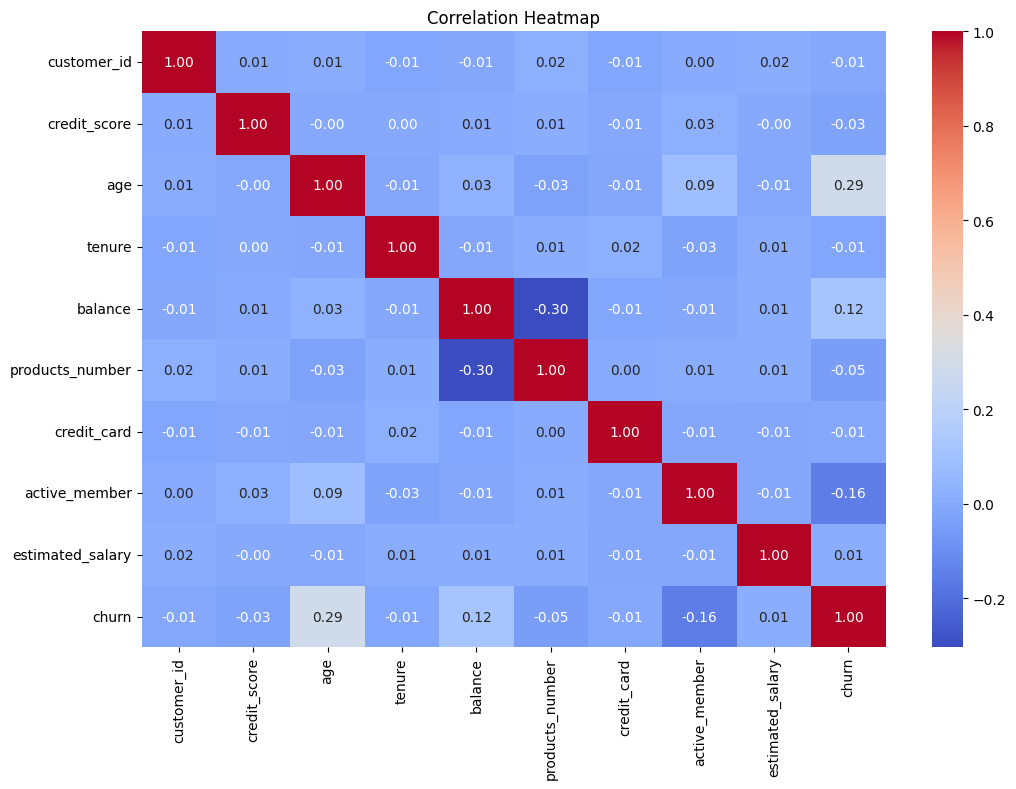

In [34]:
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include='number').corr()

sn.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)

plt.title('Correlation Heatmap')
plt.show()


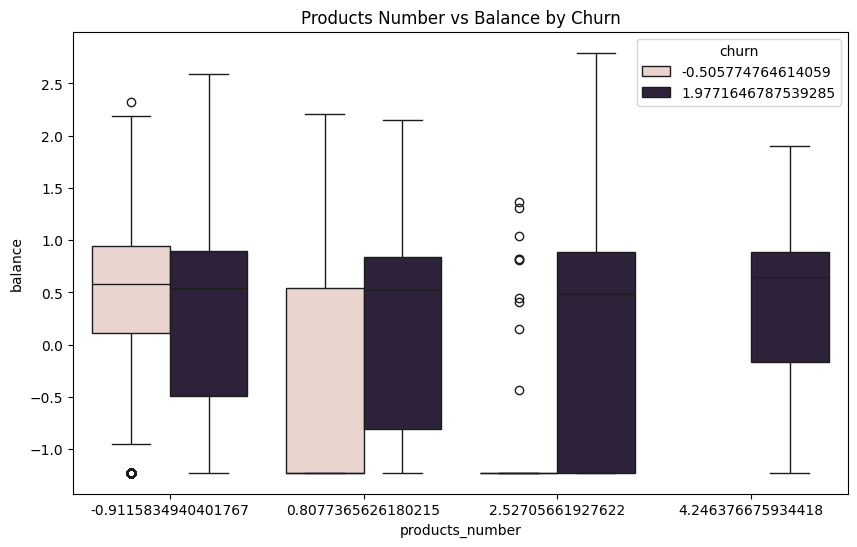

In [35]:
plt.figure(figsize=(10, 6))
sn.boxplot(x='products_number', y='balance', hue='churn', data=df)
plt.title('Products Number vs Balance by Churn')
plt.show()
